In [56]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import fcluster, linkage
from sklearn.metrics import davies_bouldin_score

In [5]:
data = pd.read_csv("clustering.csv", names=["X", "Y"])

In [6]:
data.head()

,X,Y
0,41.788907,52.220182
1,-96.586516,90.957033
2,-54.143591,-99.153377
3,19.929231,-45.859779
4,-82.941076,84.099186


In [9]:
data.dtypes

X    float64
Y    float64
dtype: object

Z racji że są to punkty w kartezjańskim układzie odniesienia `R^2`, to najlepszym obrazem rozkładu danych będzie wykres punktowy.

<AxesSubplot:xlabel='X', ylabel='Y'>

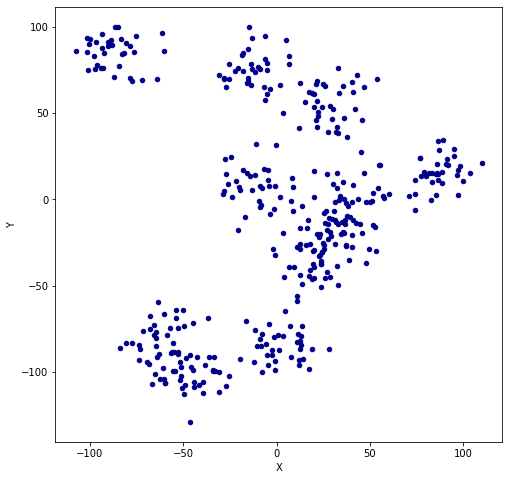

In [13]:
data.plot.scatter(x="X", y="Y", c='DarkBlue', figsize=(8,8))

Obserwujemy więc istotną seprację poszczególnych grup punktów, co może wskazywać na słuszność wykorzystania algorytmów klasteryzacji. Możemy się spodziewać, że taki algorytm, powininen wygenerować między 5 a 9 klastrów/grup.

## Klasteryzacja metodą K-means

Poniżej przeprowadzimy zrealizujemy stanowiący (z uwagi na swoją prostotę) `base-line`, algorytm klasteryzacyjny `K-means`. Zmierzymy jego skuteczność wykorzystując metrykę sumy kwadratów odległości od środków klastrów (oczywiście, życzylibyśmy sobie aby w.w suma była jak najmniejsza, przy zachowanej "rozsądnej" ilości klastrów).

<AxesSubplot:xlabel='cluster_amount'>

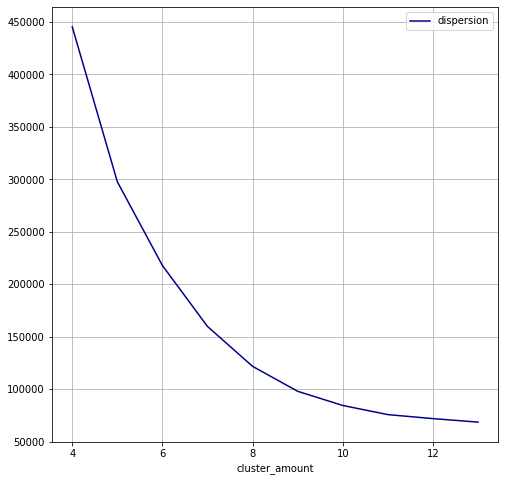

In [34]:
result = pd.DataFrame(columns=["cluster_amount", "dispersion"])
for cluster_amount in range(4,14):
    my_kmean = KMeans(n_clusters=cluster_amount)
    my_kmean.fit_predict(data)
    result = result.append({"cluster_amount": cluster_amount, "dispersion": my_kmean.inertia_},ignore_index=True)
result.plot.line("cluster_amount", "dispersion", c='DarkBlue', figsize=(8,8), grid=True)

Na podstawie powyższego wykresu, wnioskujemy, że "łokieć" (ostatni znaczący wartość wybranej metryki) na znajduje się przy 9 klastrach.  Wykonajmy więc ponownie powyższe obliczenia i zwizualizujmy przynależność do odpowiednich klastrów.

<AxesSubplot:xlabel='X', ylabel='Y'>

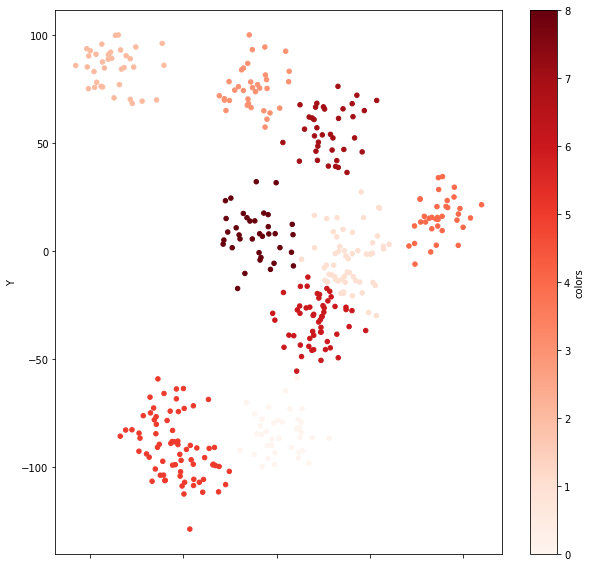

In [52]:
colors = KMeans(n_clusters=9).fit_predict(data)
data_plot = data.copy()
data_plot['colors'] = colors
data_plot.plot.scatter("X", "Y", c='colors',figsize=(10,10),colormap='Reds')

Uzyskany rezultat można spokojnie uznać jako satysfakcjonujący, wysoka separcja grup przy rozsądnej ich ilości.

## Klasteryzacja metodą hierarchiczną aglomeracyjną 

Wykorzytamy klastrowanie hierarchiczne do identyfikacji struktur w naszym zbiorze. Polega ono na stopniowym złączaniu klastrów "najbliższych" (według zadanej metryki), aż do osiągnięcia wymaganego rezultatu.

Do analizy skuteczności naszej metody (przy ustalonej liczbie klastrów) wykorzystamy metrykę `Daviesa-Bouldina`. Mierzy ona średnie "podobieństwo" klastra od jego najbliższego sąsiada (rozumiane jako odległości środków klastrów). Podobieństwo rozumiemy jako stosunek odległości obiektów wewnątrz klastra do odległości pomiędzy klastrami. 

<AxesSubplot:xlabel='cluster_amount'>

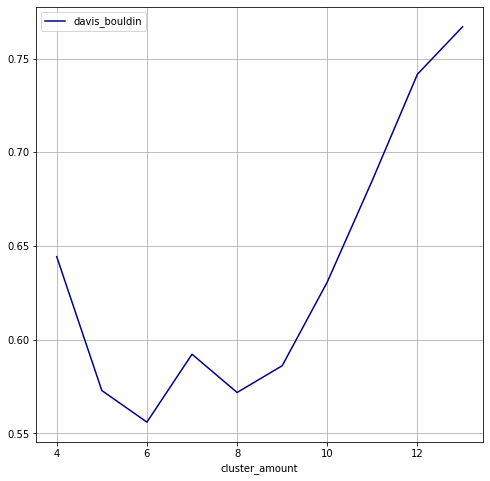

In [57]:
result = pd.DataFrame(columns=["cluster_amount", "davis_bouldin"])
dists = linkage(data, method='ward')
for cluster_amount in range(4,14):
    labels = fcluster(dists, cluster_amount, criterion = "maxclust")
    db_value = davies_bouldin_score(data, labels)
    result = result.append({"cluster_amount": cluster_amount, "davis_bouldin": db_value},ignore_index=True)
result.plot.line("cluster_amount", "davis_bouldin", c='DarkBlue', figsize=(8,8), grid=True)

Zgodnie z metryką `Daviesa-Bouldina`, możemy wywnioskować, że optymalna ilość klastrów znajduję się między 5 a 9. Z racji, że w poprzedniej sekcji wybraliśmy 9 jako optimum, możemy teraz w ramach eksperymentu zwizualizować dla `n = 6`. 

<AxesSubplot:xlabel='X', ylabel='Y'>

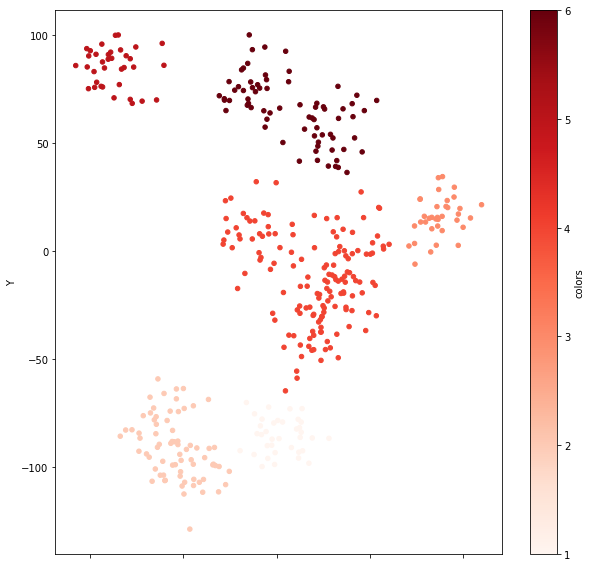

In [58]:
labels = fcluster(dists, 6, criterion = "maxclust")
data_plot['colors'] = labels
data_plot.plot.scatter("X", "Y", c='colors',figsize=(10,10),colormap='Reds')

Istotnie, w tym podejściu "górne" i "środkowe" klastry zostały połączone parami w jeden.  